# Techonologie sieciowe sprawozdanie nr 2
#### - Paweł Wilkosz

Zadania dotyczą badania modelów sieci przedstawionych za pomocą grafów.
W tym celu skorzystamy z języka Python i bibliotek `networkx` i `pyplot`.

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

color = [29/255, 102/255, 211/255]

## Szacowanie niezawodności

Do tego celu posłuży nam metoda Monte Carlo.
Nasz algorytm odbywa się w następujących krokach:
1. Dla każdej krawędzi losujemy liczbę z zakresu \[0,1\], jeśli jest większa od niezawodności danej krawędzi, usuwamy krawędź 
2. Jeśli graf pozostał spójny, zwiększamy licznik pozytywnych iteracji.
3. Powtarzamy poprzednie punkty.

Niezawodnością sieci jest liczba pozytywnych iteracji podzielona przez liczbę wszystkich iteracji.


In [95]:
import random
random.seed()
def monte_carlo(start_graph, repetitions):
    positive = 0
    for rep in range(repetitions):
        graph = start_graph.copy()
        
        for edge in list(graph.edges()):
            if random.random() > graph[edge[0]][edge[1]]['rel']:
                graph.remove_edge(edge[0], edge[1])
        
        if nx.is_connected(graph):
            positive += 1
    
    return positive / repetitions

## Model sieci

Nasze badania rozpoczynamy od grafu liniowego o 20 wierzchołkach.

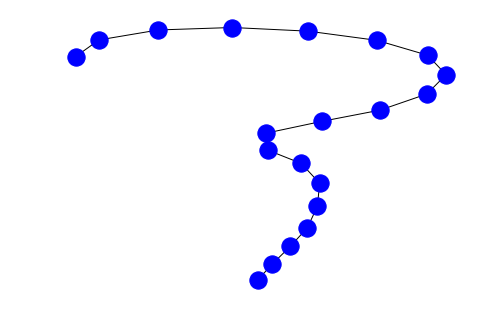

In [96]:
G = nx.path_graph(20)
nx.draw(G, node_color='b')

Definiujemy funkcję niezawodności, przyporządkowując każdej krawędzi parametr niezawodności wynoszący `0.95`

In [97]:
nx.set_edge_attributes(G, 0.95, 'rel')

Obliczamy niezawodność powyższego modelu.

In [98]:
monte_carlo(G, 1000)

0.383

Modyfikujemy poprzedni graf tak aby powstał z niego graf cykliczny.

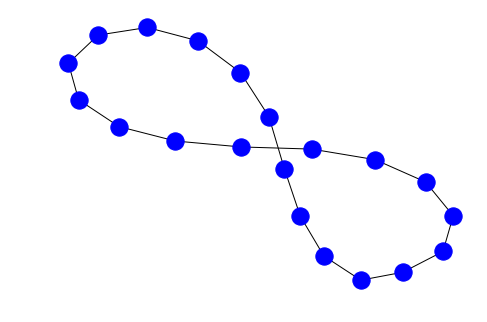

In [99]:
G.add_edge(0,19, rel=0.95)
nx.draw(G, node_color='b')

Niezawodność takiego modelu wynosi:

In [100]:
monte_carlo(G, 1000)

0.74

Jak widać, dodanie jednej krawędzi znacznie zwiększyło niezawodność sieci.

Następnie, dodajemy do naszego grafu dwie kolejne krawędzie

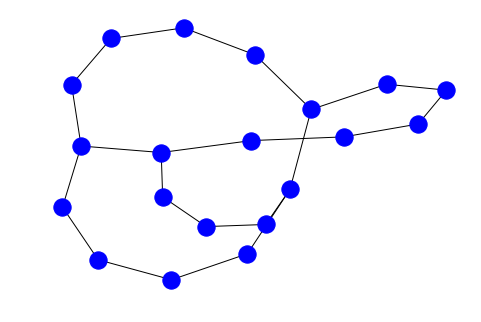

In [101]:
G.add_edge(0,9, rel=0.8)
G.add_edge(4,14, rel=0.7)
nx.draw(G, node_color='b')

Obliczamy niezawodność tak powstałej struktury

In [102]:
monte_carlo(G, 1000)

0.842

Ponownie osiągnęliśmy poprawę względem poprzedniego grafu

Następnie zbadamy wpływ dodania 4 krawędzi dodanych losowo albo intuicyjnie.

### Losowo

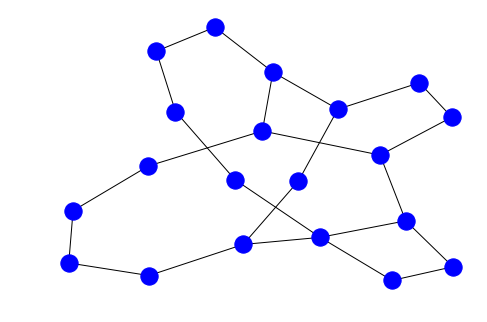

In [103]:
rand_graph = G.copy()
# generowanie krawędzi
rand_set = set()

while len(rand_set) != 8:
    rand_set.add(random.randint(0,19))
    
rand_set = list(rand_set)
# dodawanie krawędzi
for i in range(0,8,2):
    rand_graph.add_edge(rand_set[i], rand_set[i+1], rel=0.4)
    
nx.draw(rand_graph, node_color='b')

In [104]:
monte_carlo(rand_graph, 1000)

0.498

### Intuicyjnie
Najbardziej rozsądnym wyborem wydaje się połączenie najbardziej oddalonych wierzchołków. W takim wypadku krawędzie powinny łączyć punkty na grafie cyklicznym oddalone od siebie o 10 wierzchołków.

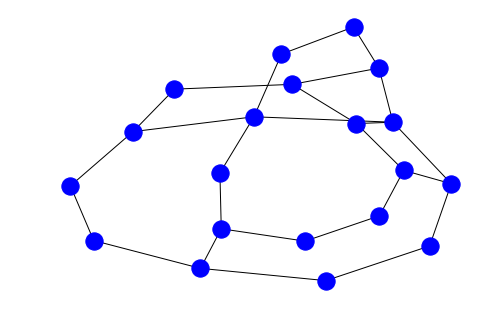

In [105]:
intuitive_graph = G.copy()
intuitive_graph.add_edge(2, 12, rel=0.4)
intuitive_graph.add_edge(7, 17, rel=0.4)
intuitive_graph.add_edge(3, 13, rel=0.4)
intuitive_graph.add_edge(9, 13, rel=0.4)

nx.draw(intuitive_graph, node_color='b')

In [106]:
monte_carlo(intuitive_graph, 1000)

0.911

Jak widać, graf skonstruowany intuicyjnie, zdecydowanie wygrywa z grafem skonstruowanym losowo. W porównaniu do poprzedniego grafu, graf zmodyfikowany losowo okazał się dużo bardziej zawodny. Model sieci skonstruowany przy pomocy mojej intuicji okazał się odrobinę bardziej niezawodny od bazowego.